## Basketball hall of fame

In [61]:
# libraries 
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sn
import matplotlib as plt

In [2]:
df=pd.read_csv("basketball_hall_of_fame_df.csv", sep=";")


In [3]:
df.describe()


,stint,minutes,rebounds,assists,steals,blocks,turnovers,careerDuration,height,weight,target
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,1.110981,1143.147244,213.537916,105.675642,28.754882,17.160135,55.097612,8.257819,78.308115,209.319949,0.099746
std,0.192713,684.297142,177.881989,103.733875,29.325399,26.254508,51.464275,4.242179,3.554492,25.217756,0.299725
min,0.000000,6.750000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,63.000000,130.000000,0.000000
25%,1.000000,580.400000,85.417500,33.000000,4.800000,1.367500,11.000000,4.250000,76.000000,190.000000,0.000000
50%,1.070000,1089.220000,171.000000,73.400000,21.220000,7.600000,43.730000,8.000000,79.000000,210.000000,0.000000
75%,1.187500,1649.680000,291.417500,143.660000,44.305000,20.917500,85.372500,11.000000,81.000000,225.000000,0.000000
max,3.000000,3190.600000,1663.080000,831.890000,193.000000,278.550000,283.230000,24.000000,91.000000,303.000000,1.000000


In [4]:
df.head()

,playerID,stint,minutes,rebounds,assists,steals,blocks,turnovers,careerDuration,pos,height,weight,college,birthDate,birthState,birthCountry,ethnicity,target
0,abdelal01,1.29,457.14,120.86,12.14,10.14,10.00,35.29,7,F-C,82.0,240.0,Duke,1968-06-24,NaN,EGY,B,0.0
1,abdulka01,1.00,2872.30,872.00,283.00,58.00,159.45,126.35,20,C,85.0,225.0,UCLA,1947-04-16,NY,USA,B,1.0
2,abdulma01,1.09,1745.64,195.09,323.18,2.36,0.55,0.00,11,G,74.0,185.0,UCLA,1942-04-15,DE,USA,B,0.0
3,abdulma02,1.00,1736.44,120.78,231.00,54.11,5.11,107.00,9,G,73.0,162.0,Louisiana State,1969-03-09,MS,USA,B,0.0
4,abdulta01,1.14,683.29,110.00,37.71,26.00,11.71,43.71,8,G-F,78.0,223.0,San Jose State,1974-11-03,NaN,FRA,B,0.0


### Data cleaning
##### find NaN values in the important features


In [7]:
nan_df=df[df.isna().any(axis=1)]
display(nan_df.head())

## only birthState column has nan values 

,playerID,stint,minutes,rebounds,assists,steals,blocks,turnovers,careerDuration,pos,height,weight,college,birthDate,birthState,birthCountry,ethnicity,target
0,abdelal01,1.29,457.14,120.86,12.14,10.14,10.00,35.29,7,F-C,82.0,240.0,Duke,1968-06-24,NaN,EGY,B,0.0
4,abdulta01,1.14,683.29,110.00,37.71,26.00,11.71,43.71,8,G-F,78.0,223.0,San Jose State,1974-11-03,NaN,FRA,B,0.0
21,ajincal01,1.25,137.75,28.00,3.25,4.75,6.50,8.00,4,C,84.0,220.0,none,1988-05-06,NaN,FRA,B,0.0
44,anderda03,1.33,421.33,97.33,19.00,6.67,7.00,19.67,3,C,83.0,245.0,Australian Institute of Sport,1980-06-23,NaN,AUS,W,0.0
56,anstech01,1.00,719.00,178.00,42.33,26.00,21.67,49.00,3,C,84.0,249.0,none,1975-01-01,NaN,AUS,W,0.0


### Add points column with coefficients 
''' rebounds = 1.2,
    assists = 1.5,
    steals = 3.0,
    blocks = 3.0,
    turnovers = -1.0 '''  https://bleacherreport.com/articles/2737042-nba-introducing-fantasy-scoring-system-for-2017-18-season#:~:text=The%20six%2Dcategory%20system%20awards,minus%2Done%20for%20a%20turnover 

In [8]:
points = 1.2*df.rebounds + 1.5*df.assists + 3.0*df.steals + 3.0*df.blocks - df.turnovers
df['points'] = points

In [43]:
# select players in the hof 
dft = df.loc[df['target']==1]

In [44]:
dft.columns

Index(['playerID', 'stint', 'minutes', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'careerDuration', 'pos', 'height', 'weight',
       'college', 'birthDate', 'birthState', 'birthCountry', 'ethnicity',
       'target', 'points'],
      dtype='object')

In [47]:
dft.points.describe()

count     236.000000
mean     1066.613123
std       370.096329
min       310.391000
25%       797.370000
50%       998.194000
75%      1259.156250
max      2468.766000
Name: points, dtype: float64

## Data exploration:
Question 1: correlation between height and points. 

In [74]:
# inch => 2.54 cm 
df['height']=df.height*2.54
df

,playerID,stint,minutes,rebounds,assists,steals,blocks,turnovers,careerDuration,pos,height,weight,college,birthDate,birthState,birthCountry,ethnicity,target,points
0,abdelal01,1.29,457.14,120.86,12.14,10.14,10.00,35.29,7,F-C,529.0312,240.0,Duke,1968-06-24,NaN,EGY,B,0.0,188.372
1,abdulka01,1.00,2872.30,872.00,283.00,58.00,159.45,126.35,20,C,548.3860,225.0,UCLA,1947-04-16,NY,USA,B,1.0,1996.900
2,abdulma01,1.09,1745.64,195.09,323.18,2.36,0.55,0.00,11,G,477.4184,185.0,UCLA,1942-04-15,DE,USA,B,0.0,727.608
3,abdulma02,1.00,1736.44,120.78,231.00,54.11,5.11,107.00,9,G,470.9668,162.0,Louisiana State,1969-03-09,MS,USA,B,0.0,562.096
4,abdulta01,1.14,683.29,110.00,37.71,26.00,11.71,43.71,8,G-F,503.2248,223.0,San Jose State,1974-11-03,NaN,FRA,B,0.0,257.985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,zasloma01,1.00,1219.75,119.00,107.50,0.00,0.00,0.00,12,G-F,477.4184,170.0,St. John's (NY),1925-12-07,NY,USA,W,0.0,304.050
2362,zawolze01,1.00,1178.00,244.00,72.33,0.00,0.00,0.00,3,F-C,509.6764,215.0,St. John's (NY),1930-10-13,NY,USA,W,0.0,401.295
2363,zellega01,1.33,259.67,34.00,13.00,0.00,0.00,3.00,3,G,483.8700,205.0,Drake,1947-11-20,KS,USA,W,0.0,57.300
2364,zhizhwa01,1.17,209.00,38.50,6.50,4.17,5.83,11.33,6,C,541.9344,220.0,none,1977-07-08,NaN,CHN,O,0.0,74.620


In [41]:
df.playerID.is_unique

True

[Text(0.5, 1.0, 'Height')]

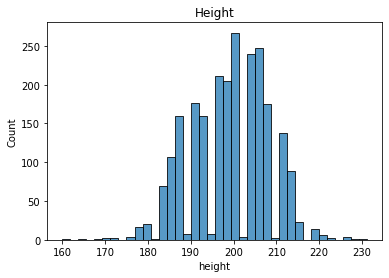

In [71]:
# height histogram
sn.histplot(data=df, x='height').set(title="Height")

[Text(0.5, 1.0, 'Points')]

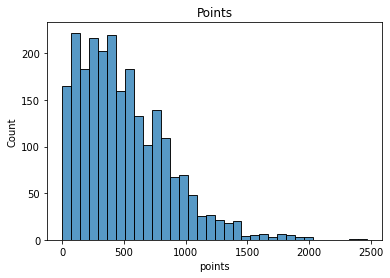

In [72]:
# points histogram
sn.histplot(data=df, x='points').set(title="Points")

[Text(0.5, 1.0, 'Scatter plot')]

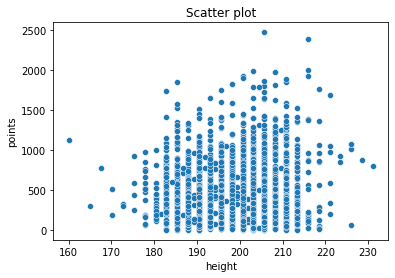

In [73]:
# scatterplot of height and points
sn.scatterplot(data=df, x='height', y='points').set(title="Scatter plot")

In [79]:
# correlation btwn height and points
corr=np.corrcoef(df['height'],df['points'])
corr[0][1]

0.08238142907094029

<AxesSubplot:>

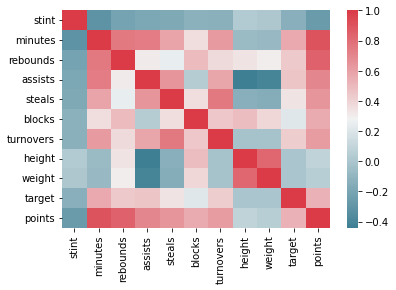

In [82]:
cr = df.loc[:, df.dtypes=='float64'].corr()
sn.heatmap(cr, xticklabels=cr.columns, yticklabels=cr.columns, cmap=sn.diverging_palette(220, 10, as_cmap=True))

In [84]:
# correlation between minutes and rebounds
corr_reb_min=np.corrcoef(df['minutes'],df['rebounds'])
corr_reb_min[0][1]

0.7508380236401251

In [85]:
# correlation btwn minutes and assists
corr_as_min=np.corrcoef(df['minutes'],df['assists'])
corr_as_min[0][1]

0.7365752736182498